Imports repositories that will be needed for analysis and visualiztaion

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#sns.set()

df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


Make the data easier to work with, break up by country, view initial baselines.

In [2]:
countries = (df.Country.unique())
years = df.Year.unique()
df.rename(columns={'Life expectancy at birth (years)': 'Life expectancy'}, inplace = True)

Chile = df[df['Country'] == 'Chile']
China = df[df['Country'] == 'China']
Germany = df[df['Country'] == 'Germany']
Mexico = df[df['Country'] == 'Mexico']
USA = df[df['Country'] == 'United States of America']
Zimbabwe = df[df['Country'] == 'Zimbabwe']

print(countries)
print(years)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [3]:
for nation in countries: print(nation + ": " + str(len(df[df['Country'] == nation])))

Chile: 16
China: 16
Germany: 16
Mexico: 16
United States of America: 16
Zimbabwe: 16


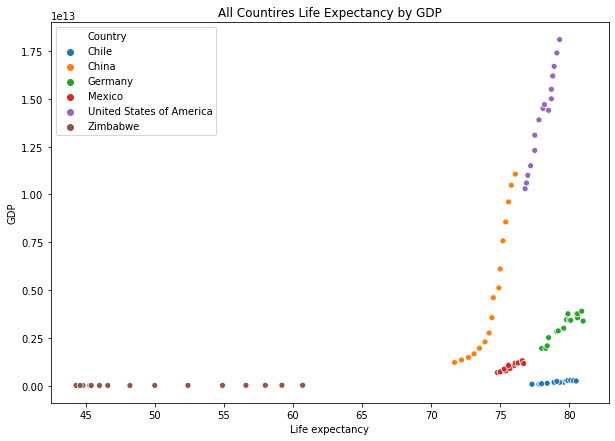

<Figure size 432x288 with 0 Axes>

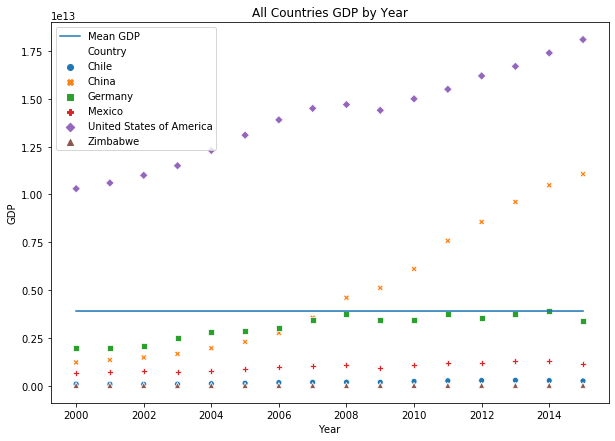

<Figure size 432x288 with 0 Axes>

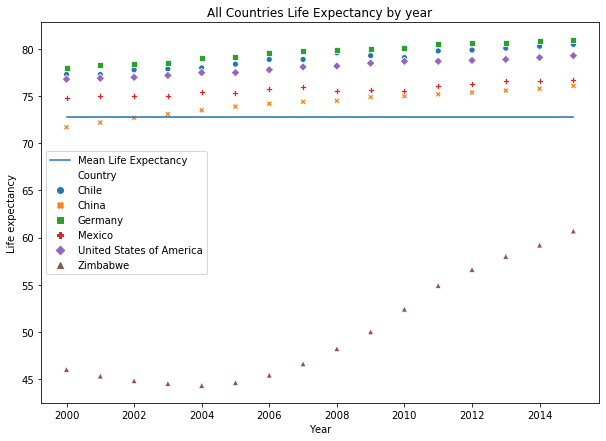

<Figure size 432x288 with 0 Axes>

In [54]:
plt.figure(figsize = (10, 7))
#sns.scatterplot(data = Germany, x = 'Life expectancy', y = 'GDP', color = 'green')
#sns.scatterplot(data = China, x = 'Life expectancy', y = 'GDP', color = 'orange')
#sns.scatterplot(data = Chile, x = 'Life expectancy', y = 'GDP', color = 'blue')
#sns.scatterplot(data = Mexico, x = 'Life expectancy', y = 'GDP', color = 'red')
#sns.scatterplot(data = USA, x = 'Life expectancy', y = 'GDP', color = 'purple')

sns.scatterplot(data = df, x = 'Life expectancy', y = 'GDP', hue = 'Country')#, color = 'purple')
plt.title('All Countires Life Expectancy by GDP')
plt.savefig('All Countires Life Expectancy by GDP.png')
plt.show()
plt.clf()

plt.figure(figsize = (10, 7))
sns.scatterplot(data = df, x = 'Year', y = 'GDP', hue = 'Country', style = ('Country'))
sns.lineplot(data = df, x = 'Year', y = df['GDP'].mean(), label = 'Mean GDP')
plt.title('All Countries GDP by Year')
plt.savefig('All Countries GDP by Year.png')
plt.show()
plt.clf()

plt.figure(figsize = (10, 7))
sns.scatterplot(data = df, x = 'Year', y = 'Life expectancy', hue = 'Country', style = ('Country'))
sns.lineplot(data = df, x = 'Year', y = df['Life expectancy'].mean(), label = 'Mean Life Expectancy')
plt.title('All Countries Life Expectancy by year')
plt.savefig('All Countries Life Expectancy by year.png')
plt.show()
plt.clf()

Chile average life expectancy: 78.94375 years


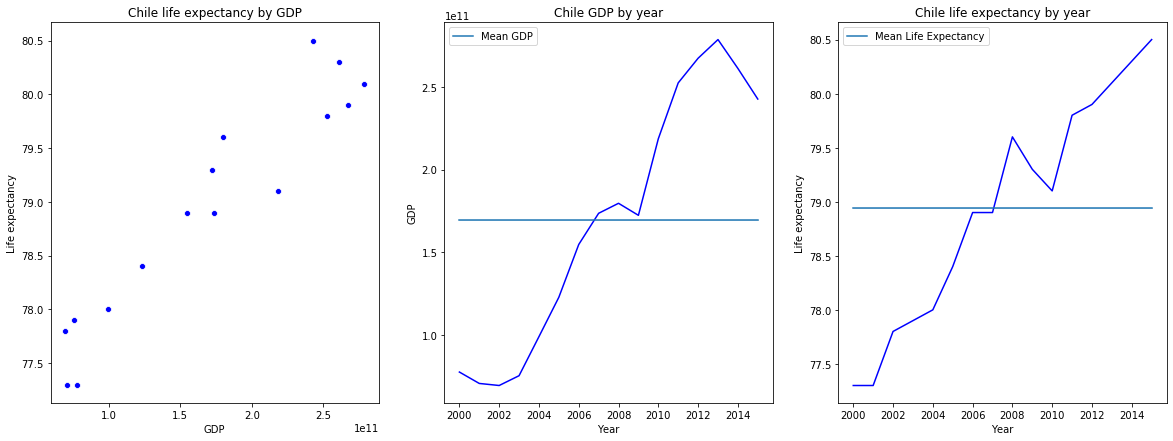

China average life expectancy: 74.26249999999999 years


<Figure size 432x288 with 0 Axes>

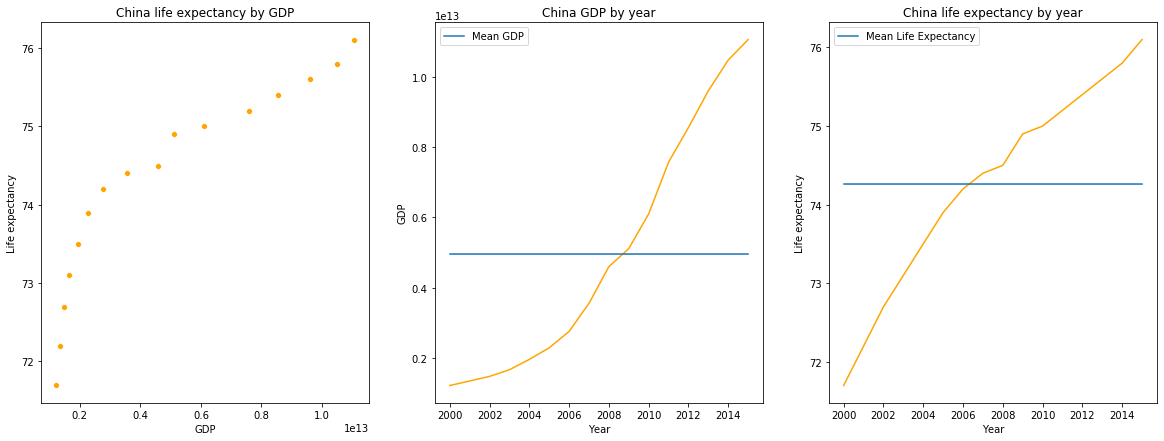

Germany average life expectancy: 79.65625 years


<Figure size 432x288 with 0 Axes>

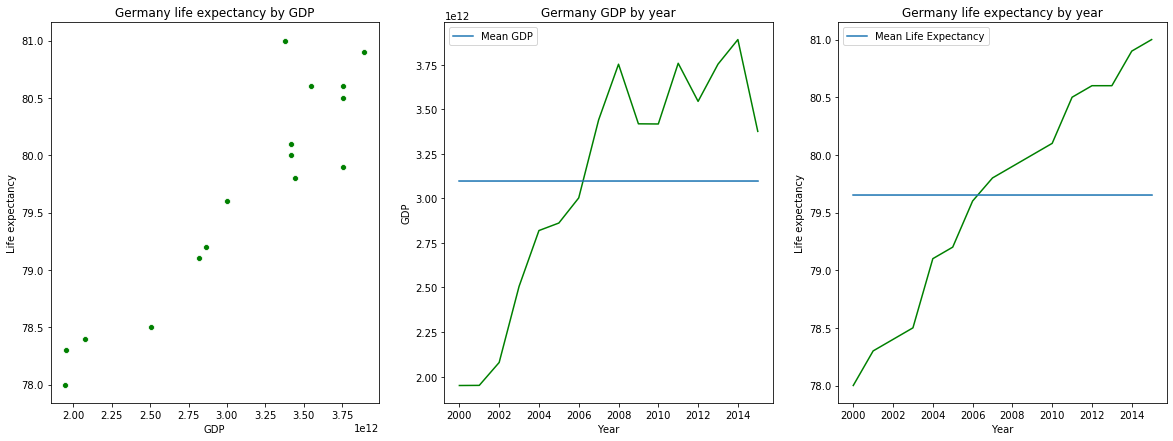

Mexico average life expectancy: 75.71875 years


<Figure size 432x288 with 0 Axes>

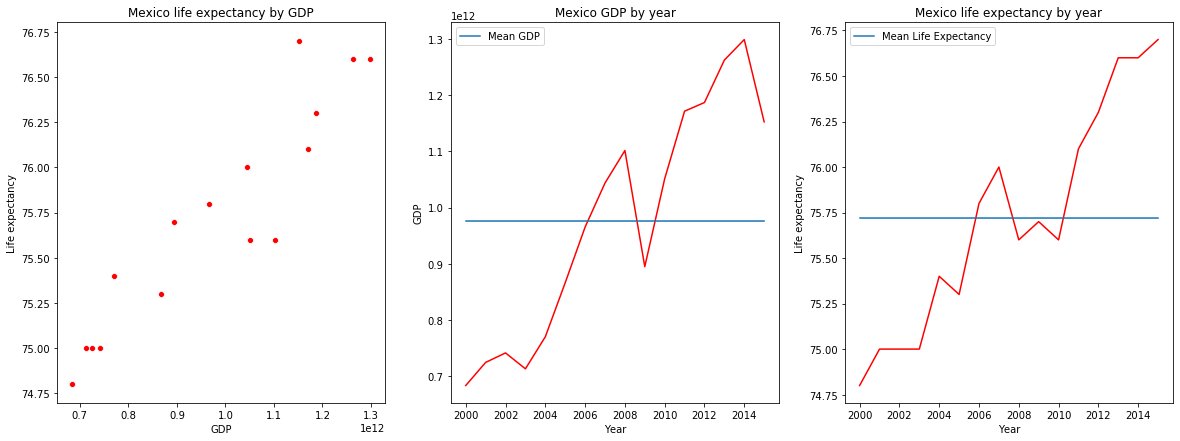

United States of America average life expectancy: 78.0625 years


<Figure size 432x288 with 0 Axes>

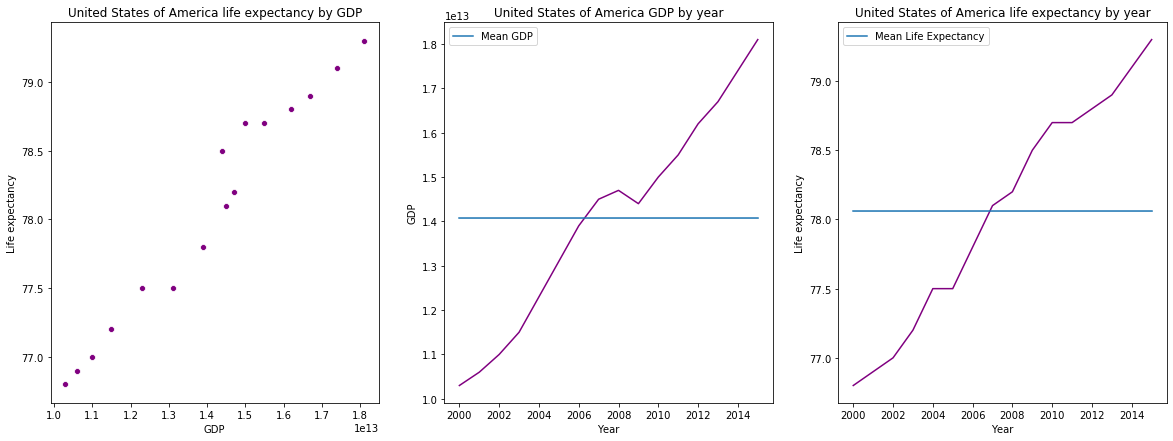

Zimbabwe average life expectancy: 50.09375 years


<Figure size 432x288 with 0 Axes>

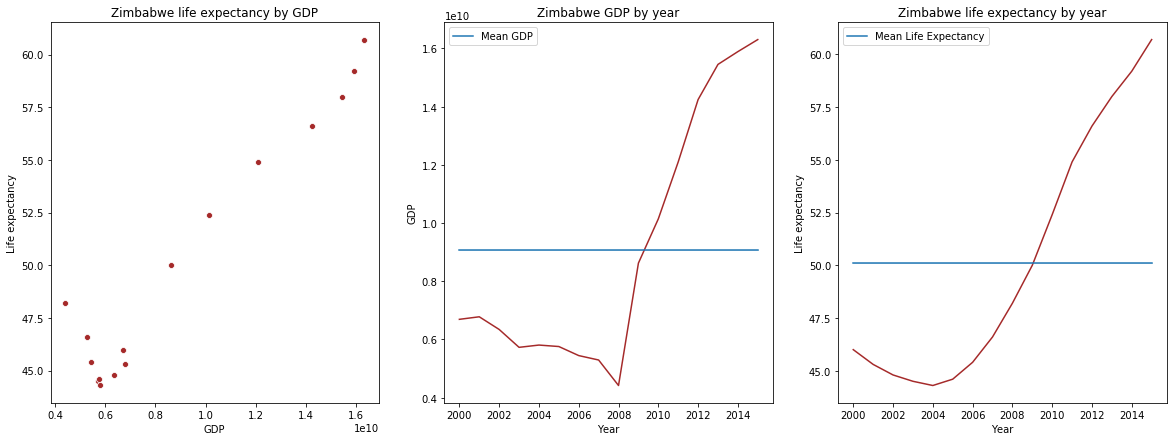

<Figure size 432x288 with 0 Axes>

In [53]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
x = 0
gdp_mean = 0
life_mean = 0
for item in countries:
    gdp_mean = (df['GDP'][df['Country'] == item].mean())
    life_mean = (df['Life expectancy'][df['Country'] == item].mean())
    print(item + ' average life expectancy: ' + str(life_mean) + ' years')
    
    fig, axes = plt.subplots(1, 3, figsize = (20, 7))#, sharex= False, sharey= False)
    sns.scatterplot(ax=axes[0], data = df[df['Country'] == item], x = 'GDP', y = 'Life expectancy', color = colors[x])
    #sns.lineplot(ax = axes[0], data = df, x = gdp_mean, y = 'Life expectancy')
    axes[0].set_title(item + ' life expectancy by GDP')

    sns.lineplot(ax=axes[1], data = df[df['Country'] == item], x = 'Year', y = 'GDP', color = colors[x])
    sns.lineplot(ax = axes[1], data = df, x = 'Year', y = gdp_mean, dashes = [(2, 2)], label = 'Mean GDP')
    axes[1].set_title(item + ' GDP by year')

    sns.lineplot(ax=axes[2], data = df[df['Country'] == item], x = 'Year', y = 'Life expectancy', color = colors[x])
    sns.lineplot(ax = axes[2], data = df, x = 'Year', y = life_mean, dashes = [(2, 2)], label = 'Mean Life Expectancy')
    axes[2].set_title(item + ' life expectancy by year')
    plt.savefig(item + '.png')
    plt.show()
    plt.clf()
    x +=1